In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Data Pre-processing

## Loading the dataset

In [ ]:
crop_yield_data = pd.read_csv('/content/crop_yield.csv')

In [ ]:
# Visualising the shape of our data

crop_yield_data.shape

(1000000, 10)

In [ ]:
# Viewing first 5 rows

crop_yield_data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [ ]:
# Viewing last 5 rows

crop_yield_data.tail()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159
999999,West,Sandy,Maize,180.936180,27.298847,True,False,Sunny,76,2.937243


## Checking and handling null values

In [ ]:
crop_yield_data.isnull().sum()

# We have only one row with NaN, since we have over 790k rows we an atually just delete a single datapoint

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


In [ ]:
# We delete row with a min of 5 emtpy columns
crop_yield_data = crop_yield_data.dropna(
    axis=0,
    thresh = len(crop_yield_data.columns) - 5
)

In [ ]:
# Null dense row has been deleted
crop_yield_data.isnull().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


## Evaluating dataset balance

In [ ]:
# Making sure  that regions are balanced

crop_yield_data['Region'].value_counts()

,count
Region,
North,250173
West,250074
South,250054
East,249699


All regions are quiet balanced, no need to re-balance dataset

## Encoding Columns

In [ ]:
crop_yield_data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [ ]:
print(crop_yield_data['Region'].value_counts())
print('\n')
print(crop_yield_data['Soil_Type'].value_counts())
print('\n')
print(crop_yield_data['Crop'].value_counts())
print('\n')
print(crop_yield_data['Fertilizer_Used'].value_counts())
print('\n')
print(crop_yield_data['Irrigation_Used'].value_counts())
print('\n')
print(crop_yield_data['Weather_Condition'].value_counts())

# We then seperate categerocial columns from binary columns


Region
North    250173
West     250074
South    250054
East     249699
Name: count, dtype: int64


Soil_Type
Sandy     167119
Loam      166795
Chalky    166779
Silt      166672
Clay      166352
Peaty     166283
Name: count, dtype: int64


Crop
Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: count, dtype: int64


Fertilizer_Used
False    500060
True     499940
Name: count, dtype: int64


Irrigation_Used
False    500509
True     499491
Name: count, dtype: int64


Weather_Condition
Sunny     333790
Rainy     333561
Cloudy    332649
Name: count, dtype: int64


### One Hot encoding nominal columns

In [ ]:
# One hot encoding nominal columns

cols = ['Soil_Type', 'Region', 'Crop', 'Weather_Condition']

encoder = OneHotEncoder(
    drop = 'first',
    sparse_output = False
)

X_encoded = encoder.fit_transform(crop_yield_data[cols])
encoded_cols = encoder.get_feature_names_out()

X_encoded_df = pd.DataFrame(X_encoded, index=crop_yield_data.index, columns = encoded_cols)

crop_data_encoded = pd.concat([crop_yield_data.drop(columns=cols), X_encoded_df], axis=1)

crop_data_encoded.head()


,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,...,Region_North,Region_South,Region_West,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,6.555816,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,992.673282,18.026142,True,True,140,8.527341,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,147.998025,29.794042,False,False,106,1.127443,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,986.866331,16.644190,False,True,146,6.517573,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,730.379174,31.620687,True,True,110,7.248251,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Binary Encoding binary columns

In [ ]:
# Binary Encoding Truthy columns

crop_data_encoded = crop_data_encoded.replace({True: 1, False:0})

crop_data_encoded.head()

/tmp/ipython-input-3862753274.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  crop_data_encoded = crop_data_encoded.replace({True: 1, False:0})


,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,...,Region_North,Region_South,Region_West,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,0,1,122,6.555816,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,992.673282,18.026142,1,1,140,8.527341,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,147.998025,29.794042,0,0,106,1.127443,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,986.866331,16.644190,0,1,146,6.517573,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,730.379174,31.620687,1,1,110,7.248251,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Splitting Data into Train Test

In [ ]:
X = crop_data_encoded.drop(columns='Yield_tons_per_hectare')
Y = crop_data_encoded['Yield_tons_per_hectare']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(800000, 20) (800000,)
(200000, 20) (200000,)


##

##

# Helper functions

In [ ]:
def evaluate_model(model,y_pred):


  # Predictions for both to check for overfitting
  y_train_pred = model.predict(X_train)

  # Metrics for Test Set
  mae = mean_absolute_error(Y_test, y_pred)
  mse = mean_squared_error(Y_test, y_pred)

  r2_train = r2_score(Y_train, y_train_pred)
  r2_test = r2_score(Y_test, y_pred)


  print(f"MAE: {mae:.4f}")
  print(f"MSE: {mse:.4f}")
  print(f"R2 Score (Test): {r2_test:.4f}")
  print(f"R2 Score (Train): {r2_train:.4f}")


In [ ]:
def evaluate_nn(model ,y_pred_rescaled, X_train_std, scaler_y):
    #1. Prediction on train model inorder to have an R2 score
    y_train_pred = model.predict(X_train_std)

    # 2. We will then reverse rescale our predictions to get an accurate scaled MEA, MSE and R2 score
    y_train_pred = scalerY.inverse_transform(y_train_pred)

    # 3. Calculate metrics using original units
    mae = mean_absolute_error(Y_test, y_pred_rescaled)

    mse = mean_squared_error (Y_test,y_pred_rescaled)

    r2_test = r2_score(Y_test, y_pred_rescaled)
    r2_train = r2_score(Y_train,y_train_pred)

    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R2_train:{ r2_train:.2f}")
    print(f"R2_test: {r2_test:.2f}")

    return y_pred_rescaled

In [ ]:
def plot(y_pred, title):
  pltTitle = 'Actual vs Predicted Yield ' + title
  plt.figure(figsize=(8, 6))
  plt.scatter(Y_test, y_pred, alpha=0.5, color='green')
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
  plt.xlabel('Actual Yield')
  plt.ylabel('Predicted Yield')
  plt.title(pltTitle)
  plt.show()

In [ ]:
def plot_history(history):
# Loss'
  plt.plot(history.history['loss'], label = 'Training loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title('Training Loss')
  plt.legend()
  plt.show()

  # Loss'
  plt.plot(history.history['mae'], label = 'Training MAE')
  plt.xlabel("Epochs")
  plt.title('MAE')
  plt.ylabel("Loss")
  plt.legend()
  plt.show()


  # Val_loss
  plt.title('Training Loss vs Val_loss')
  plt.plot(history.history['loss'], label = 'Training loss')
  plt.plot(history.history['val_loss'], label = 'Training Val_loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

# **Model Training - Traditional ML models**




## **Decision Tree**

### Decision Tree Baseline

We'll use decision tree as our base model evaluator for our tree models

In [ ]:
# Our first model is a tree we will allow to grow as deep as possible. Due to the lack of pre-pruning, this tree model will most likely be a very overfitted model that has captured most of the noise in our dataset

dt = DecisionTreeRegressor(
    criterion='squared_error',
    random_state=42
)

dt.fit(
    X_train,Y_train
)

y_pred = dt.predict(X_test)


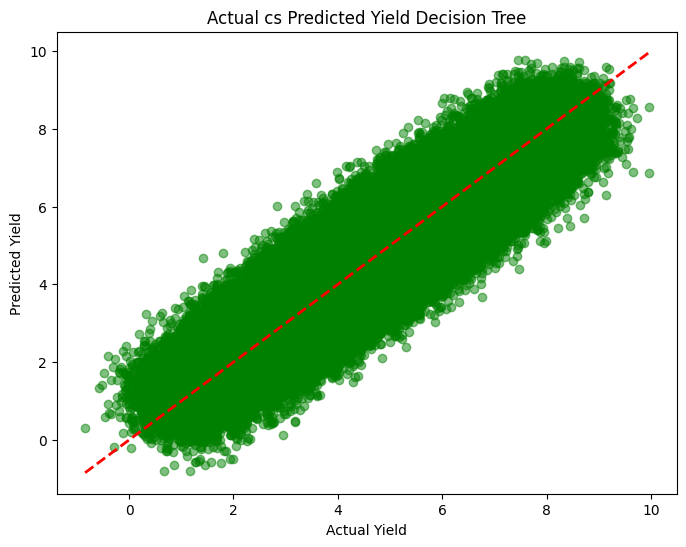

In [ ]:
plot(y_pred, 'Decision Tree')




In [ ]:
evaluate_model(dt,y_pred)

MAE: 0.5825
MSE: 0.5308
R2 Score (Test): 0.8159
R2 Score (Train): 1.0000


### Decision Tree (Pre-pruning)

In [ ]:
dt2 = DecisionTreeRegressor(
    criterion = 'squared_error',
    min_samples_leaf= 20,
    max_depth = 15,
    random_state = 42
)

dt2.fit(X_train,Y_train)

y_pred = dt2.predict(X_test)

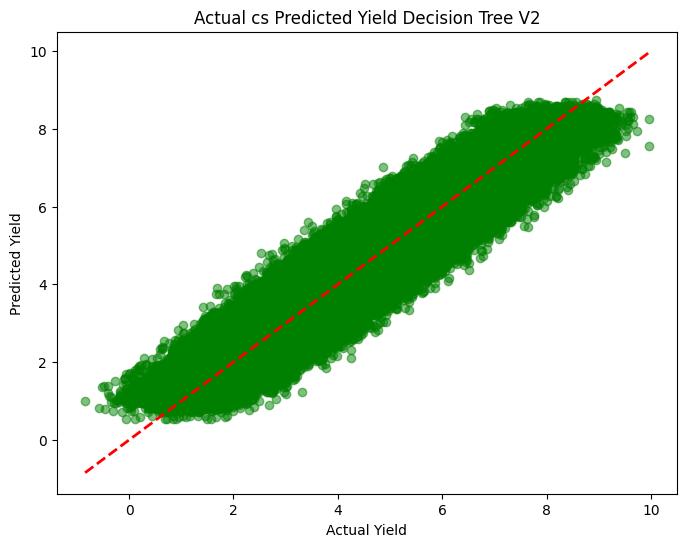

In [ ]:
plot(y_pred, 'Decision Tree V2')

In [ ]:
evaluate_model(dt2,y_pred)

MAE: 0.4155
MSE: 0.2711
R2 Score (Test): 0.9060
R2 Score (Train): 0.9200


## **RandomForestRegresso**r

In [ ]:
rfr = RandomForestRegressor(
    n_estimators = 100,
    criterion = 'squared_error',
    max_depth = 10,
    min_samples_leaf= 20,
    bootstrap= True,
    oob_score = True,
    random_state = 42
)

rfr.fit(X_train,Y_train)

y_pred = rfr.predict(X_test)

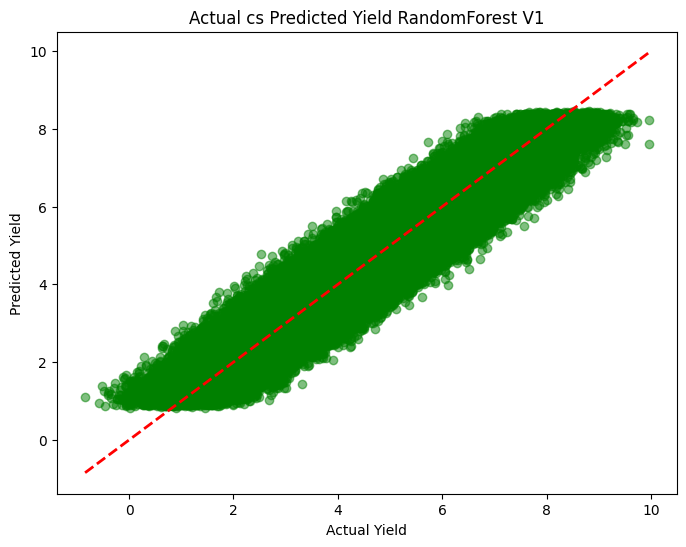

In [ ]:
plot(y_pred, 'RandomForest V1')

In [ ]:
evaluate_model(rfr, y_pred)

MAE: 0.4002
MSE: 0.2516
R2 Score (Test): 0.9127
R2 Score (Train): 0.9141


## **XGBOOST**

In [ ]:
from xgboost import XGBRegressor

### **XGBOOST V1**

In [ ]:
xgb = XGBRegressor(
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 2,
    random_state = 42
)

xgb.fit(X_train, Y_train)

y_pred = xgb.predict(X_test)

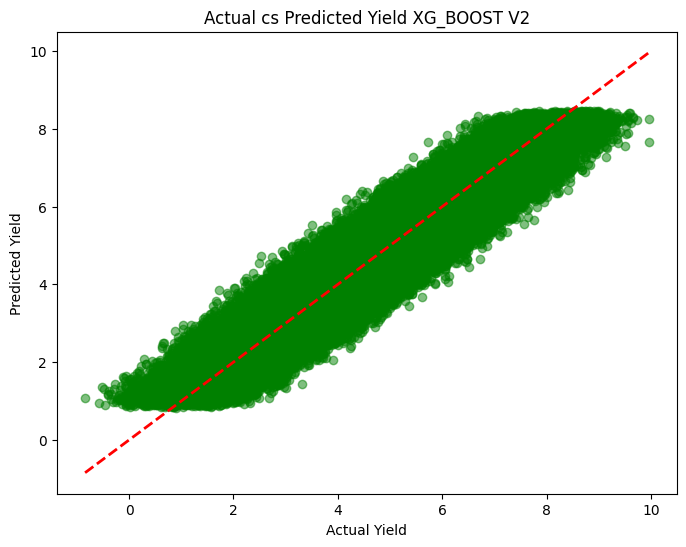

In [ ]:
plot(y_pred, 'XG_BOOST V2')

In [ ]:
evaluate_model(xgb,y_pred)

MAE: 0.4006
MSE: 0.2521
R2 Score (Test): 0.9126
R2 Score (Train): 0.9126


# **Model Training - Deep Learning**

In [58]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    restore_best_weights = True,
    verbose = 1
)

In [59]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = .2,
    patience = 5,
    min_lr = 1e-7,
    verbose = 1
)

## Standardizing the Data & Deep learning imports

In [ ]:
scalerX = StandardScaler()
scalerY = StandardScaler()

# Fit X
X_train_std = scalerX.fit_transform(X_train)
X_test_std = scalerX.transform(X_test)

# Fit Y
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

Y_train_std = scalerY.fit_transform(Y_train)
Y_test_std = scalerY.transform(Y_test)


In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## **Neural Network - V1**

In [ ]:
model = keras.Sequential([
    layers.Dense(
        64,
        activation = 'relu',
        kernel_initializer = 'he_normal',
        input_shape = (20,)
    ),

    layers.Dense(
        32,
        activation = 'relu',
        kernel_initializer = 'he_normal'
    ),

    layers.Dense(1) # The regression output
])

model.summary()

model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train_std,
    Y_train_std,
    verbose = 0,
    batch_size = 512,
    epochs = 100,
    validation_split = .2
)

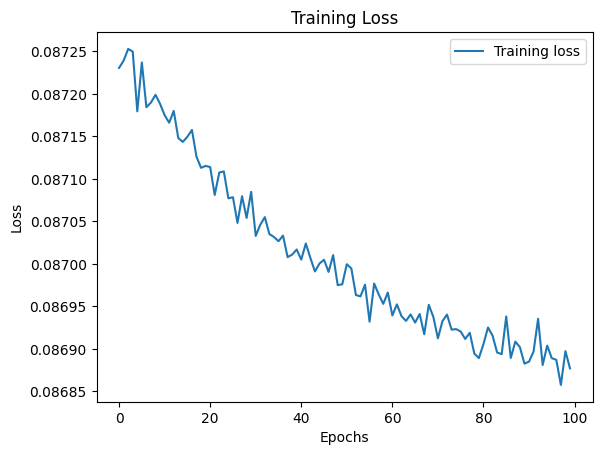

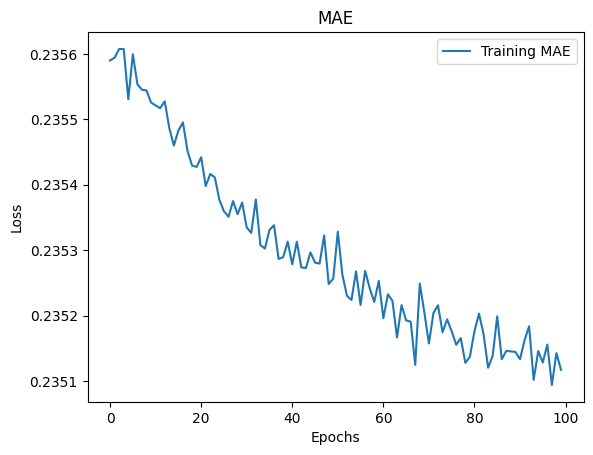

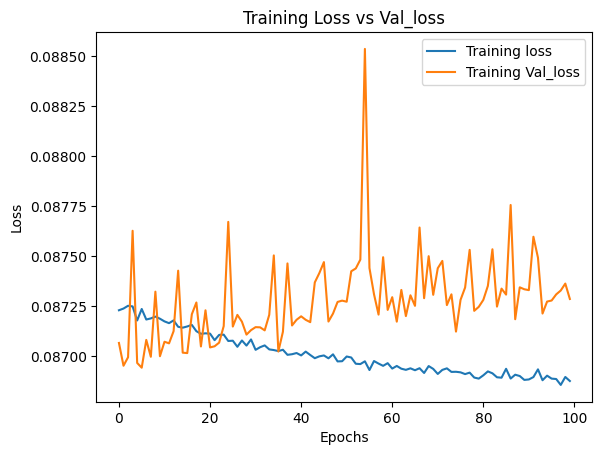

In [ ]:
plot_history(history)

In [ ]:
y_pred = model.predict(X_test_std)

# We inverse transform the predictions back to the original units
y_pred_rescaled = scalerY.inverse_transform(y_pred)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


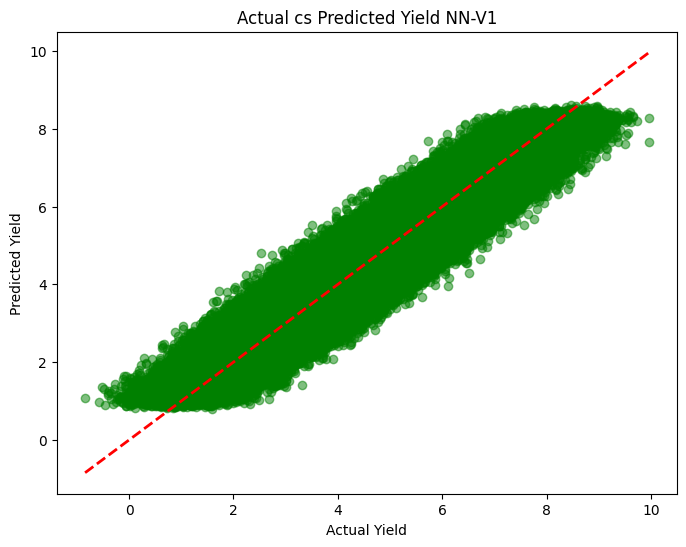

In [ ]:
plot(y_pred_rescaled, 'NN-V1')

In [ ]:
evaluate_nn(model,y_pred_rescaled,X_train_std,scalerY)

25000/25000 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step
MAE: 0.40
MSE: 0.25
R2_train:0.91
R2_test: 0.91


array([[4.0289917],
       [4.734606 ],
       [7.207615 ],
       ...,
       [4.4119625],
       [3.947131 ],
       [6.1904416]], dtype=float32)

## **Neural Network - V2 (L2 + Dropout + EarlyStopping + ReduceLROnPlateau)**

In [75]:
model2 = keras.Sequential([
    layers.Dense(
        64,
        activation = 'relu',
        input_shape = (20,),
        kernel_initializer = 'he_normal',
        kernel_regularizer =  'l2'
    ),
    layers.Dropout(0.5),

    layers.Dense(
        32,
        activation = 'relu',
        kernel_initializer = 'he_normal',
        kernel_regularizer =  'l2'
    ),
    layers.Dropout(0.5),

    layers.Dense(
        1,
    )
])

model2.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae', 'accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
history2 = model2.fit(
    X_train_std,
    Y_train_std,
    epochs = 250,
    batch_size = 512,
    validation_split = .2,
    callbacks = [early_stopping, reduce_lr],
    verbose = 0
)


Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 11: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.


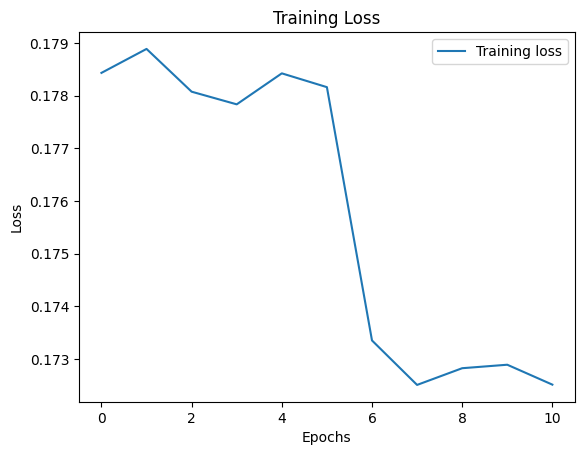

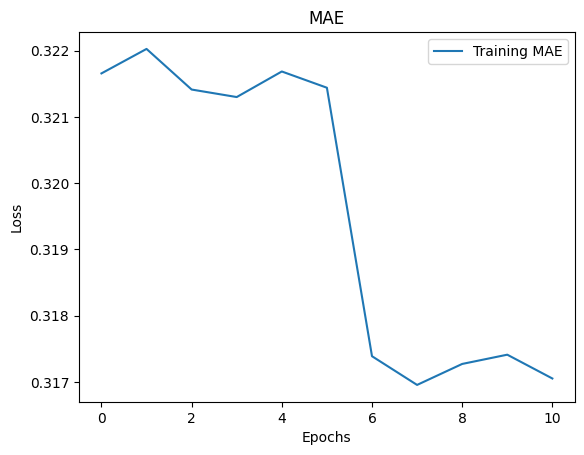

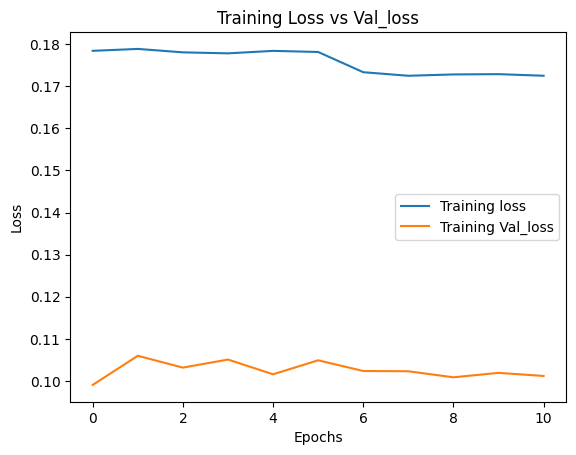

In [61]:
plot_history(history2)

In [62]:
y_pred = model2.predict(X_test_std)

# We inverse transform the predictions back to the original units
y_pred_rescaled = scalerY.inverse_transform(y_pred)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


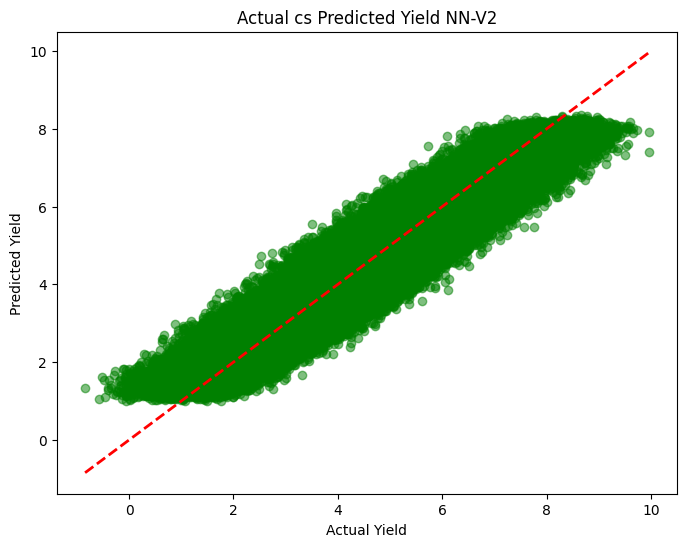

In [63]:
plot(y_pred_rescaled, 'NN-V2')

In [64]:
evaluate_nn(model2,y_pred_rescaled,X_train_std,scalerY)

25000/25000 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step
MAE: 0.41
MSE: 0.26
R2_train:0.91
R2_test: 0.91


array([[4.0589347],
       [4.673679 ],
       [7.041733 ],
       ...,
       [4.744457 ],
       [3.7367847],
       [6.1631823]], dtype=float32)

## **Neural Network - V3 (L2 + Dropout(0.5 -> 0.3) + EarlyStopping + ReduceLROnPlateau)**

In [69]:
model3 = keras.Sequential([
    layers.Dense(
        64,
        activation = 'relu',
        input_shape = (20,),
        kernel_initializer = 'he_normal',
        kernel_regularizer =  'l2'
    ),
    layers.Dropout(0.2),

    layers.Dense(
        32,
        activation = 'relu',
        kernel_initializer = 'he_normal',
        kernel_regularizer =  'l2'
    ),
    layers.Dropout(0.2),

    layers.Dense(
        1,
    )
])

model3.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae', 'accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
history3 = model3.fit(
    X_train_std,
    Y_train_std,
    epochs = 250,
    batch_size = 512,
    validation_split = .2,
    callbacks = [early_stopping, reduce_lr],
    verbose = 0
)


Epoch 39: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 50: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 60: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.

Epoch 65: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Epoch 65: early stopping
Restoring model weights from the end of the best epoch: 55.


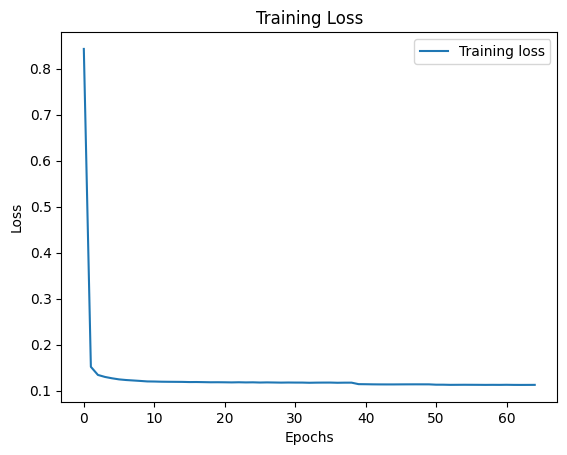

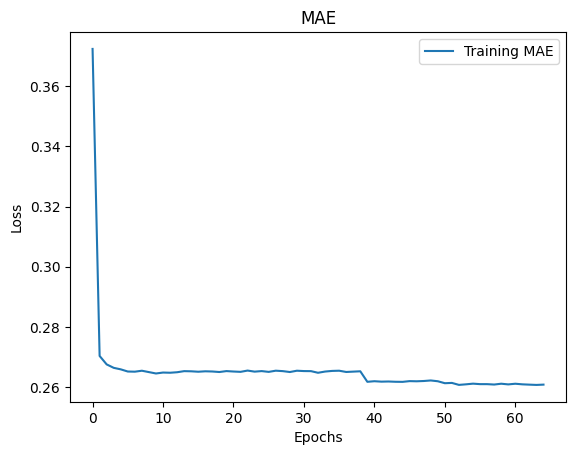

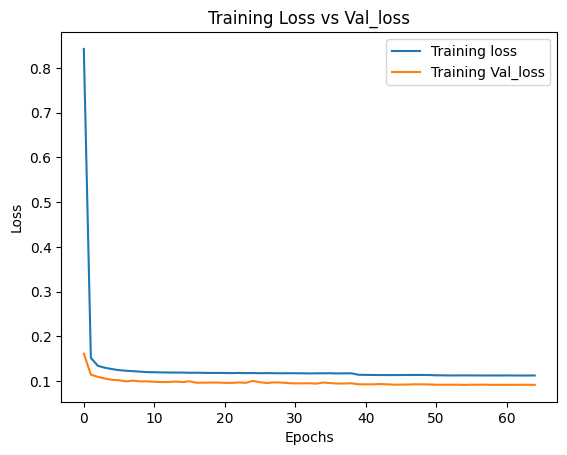

In [71]:
plot_history(history3)

In [72]:
y_pred = model3.predict(X_test_std)

# We inverse transform the predictions back to the original units
y_pred_rescaled = scalerY.inverse_transform(y_pred)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


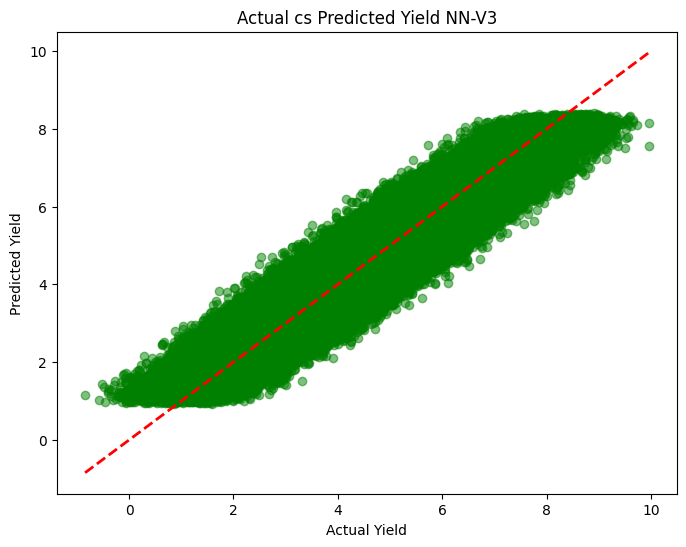

In [76]:
plot(y_pred_rescaled, 'NN-V3')

In [77]:
evaluate_nn(model3,y_pred_rescaled,X_train_std,scalerY)

25000/25000 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step
MAE: 0.40
MSE: 0.25
R2_train:0.91
R2_test: 0.91


array([[4.071524 ],
       [4.742256 ],
       [7.149735 ],
       ...,
       [4.6400104],
       [3.949905 ],
       [6.1822267]], dtype=float32)

##

#